# Null hypothesis: the distribution of ages of Citi Bike riders draws from a normal/Gaussian distribution.

In [1]:
from __future__ import print_function, division
import numpy as np
import pylab as pl

import numpy as np
import pandas as pd
import zipfile
import csv
import scipy

import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [16]:
datestring = '201501'
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"

zf = zipfile.ZipFile(datestring+'-citibike-tripdata.zip')
df = pd.read_csv(zf.open(datestring+'-citibike-tripdata.csv'))

df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6845k  100 6845k    0     0  15.3M      0 --:--:-- --:--:-- --:--:-- 23.9M


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [3]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [20]:
# creating age data from birth year
df['age'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [21]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'age'],
      dtype='object')

In [22]:
df['age'].head()

0    55.0
1    52.0
2    41.0
3    46.0
4    38.0
Name: age, dtype: float64

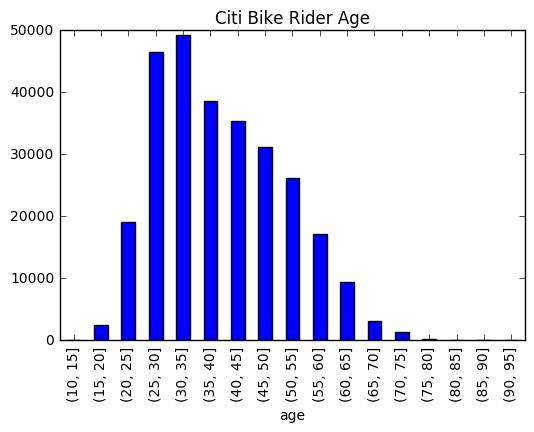

In [27]:
bins = np.arange(10, 99, 5)
ax = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
ax.set_title("Citi Bike Rider Age")

In [24]:
df['age'].values

array([ 55.,  52.,  41., ...,  21.,  58.,  41.])

In [26]:
# removing NaN
df['age'].dropna()
# running KS test
scipy.stats.kstest(df['age'], 'norm', args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.087552112722896369, pvalue=0.0)

## P value of 0.0 means we can reject the null

In [36]:
?scipy.stats

In [28]:
# KS test for Chi Square distribution
scipy.stats.kstest(df['age'], 'chi2', args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.47545108561846439, pvalue=0.0)

## P value of 0.0 again means we reject the null. Distribution of ages must be something other than normal or Chi Square.

In [32]:
# looks like binomial is not an option for ks test
# out of curiosity, two more tests below:
scipy.stats.kstest(df['age'], 'poisson', args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.54549802539711778, pvalue=0.0)

In [37]:
# still p values of 0.0
scipy.stats.kstest(df['age'], 'lognorm', args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.51704877290040629, pvalue=0.0)

## Now doing Anderson-Darling test on various distributions

In [40]:
scipy.stats.anderson(df['age'], 'norm')

AndersonResult(statistic=2732.9753468561685, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [42]:
?scipy.stats.anderson

## A-D test shows a statistic (2733) way over all the options provided (1.092 being the largest option, for a 1% confidence interval), so null is rejected.

In [45]:
scipy.stats.anderson(df['age'], 'expon')

AndersonResult(statistic=66066.210136580979, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [46]:
scipy.stats.anderson(df['age'], 'gumbel')

AndersonResult(statistic=inf, critical_values=array([ 0.474,  0.637,  0.757,  0.877,  1.038]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ]))

In [48]:
scipy.stats.anderson(df['age'], 'logistic')

AndersonResult(statistic=2893.1871237001615, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

In [50]:
# same as gumbel - weird
scipy.stats.anderson(df['age'], 'extreme1')

AndersonResult(statistic=inf, critical_values=array([ 0.474,  0.637,  0.757,  0.877,  1.038]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ]))

## All of the above distributions also had test statistics over the options, so it's not those distributions.

In [1]:
# I don't understand why the assignment asks for comments about the central limit theorem. We're looking at just one
# sample, not multiple samples that gradually converge toward a population mean. Also, this question says "each plot",
# but it seems we only need one plot for this assignment.